<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.

In [1]:
import pandas as pd

df = pd.read_csv('/content/서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='euc-kr')
df = df[df['측정소명'] == '송파구'][['측정일시', '측정소명', '오존(ppm)']]

## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [8]:
s1 = df.sample(20, random_state=42)
s2 = df.sample(200, random_state=42)

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [47]:
# 표본 평균
s1_mean = s1['오존(ppm)'].mean()
s2_mean = s2['오존(ppm)'].mean()

0.021750000000000002

## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [10]:
from scipy.stats import t
import numpy as np

# 표본의 크기
n1 = len(s1)
n2 = len(s2)
# 자유도
dof_s1 = n1-1
dof_s2 = n2-1
# 표본의 표준편차
s1_std = np.std(s1['오존(ppm)'], ddof = 1)
s2_std = np.std(s2['오존(ppm)'], ddof = 1)
# 표준 오차
s1_std_err = s1_std / n1 ** 0.5 # sample_std / sqrt(n)
s2_std_err = s2_std / n2 ** 0.5

CI1 = t.interval(.95, dof_s1, loc = s1_mean, scale = s1_std_err)   # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
CI2 = t.interval(.95, dof_s2, loc = s2_mean, scale = s2_std_err)

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






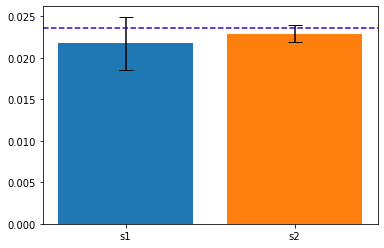

In [11]:
import matplotlib.pyplot as plt

pop_mean = df['오존(ppm)'].mean()
plt.axhline(pop_mean, color = '#4000c7', linestyle = '--')
plt.bar(x = 's1', height = s1_mean, yerr = s1_std_err, capsize=7)
plt.bar(x = 's2', height = s2_mean, yerr = s2_std_err, capsize=7)
plt.show()

In [13]:
min(df.shape)

3

In [14]:
s1['오존(ppm)'][9199]

0.033

In [15]:
s2['오존(ppm)'][4372]

0.044000000000000004

In [17]:
round(CI1[0], 3)

0.015

In [18]:
round(CI2[1], 3)

0.025

In [19]:
round(pop_mean, 4)

0.0236

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

In [54]:
# plotly

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(name = 's1', x = ['s1'], y=s1['오존(ppm)'], error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=[s1_std_err])))
fig.add_trace(go.Bar(name = 's2', x = ['s2'], y=s2['오존(ppm)'], error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=[s2_std_err])))
fig.show()

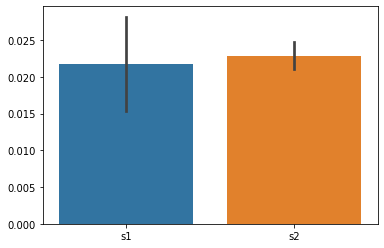

In [39]:
# seaborn

import seaborn as sns

sns.barplot(data = pd.DataFrame({'s1':s1['오존(ppm)'], 's2':s2['오존(ppm)']}))
plt.show()

In [60]:
# bokeh 그래프가 안그려져요!!! ?!?!?!?

# !pip install bokeh

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

graph = figure()
graph.vbar(s1_mean)
show(graph)

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한가설을 표현하는 코드를 작성하세요.

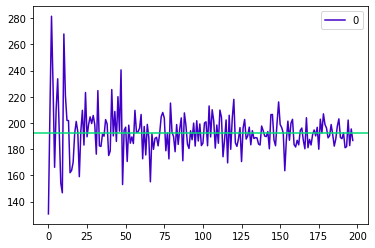

In [85]:
# 큰 수의 법칙 : 셈플의 수가 많아지면, 셈플의 분산은 모집단의 분산에 가까워 진다.

df = pd.read_csv('/content/서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='euc-kr')
df_challenge = df['초미세먼지(㎍/㎥)']

dat = []

for i in np.arange(start = 5, stop = 995, step = 5) :
  s = np.random.choice(df_challenge, i)
  dat.append(s.var())
dat

(pd
 .DataFrame(dat)
 .plot
 .line(color = '#4000c7')
 .axhline(y = df_challenge.var(), color = '#00da75')
 );

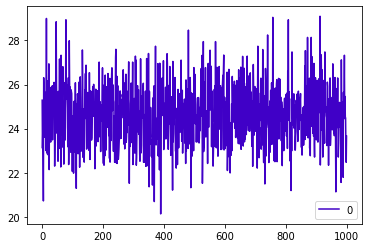

In [93]:
# 중심 극한 가설 : 샘플의 데이터 갯수가 많아지면 많아질수록 샘플의 평균은 샘플의 정규분포와 가까워진다.

sample_means = []

for x in range(0, 1000):
  rand_sample = df_challenge.sample(100)
  sample_means.append(rand_sample.mean())

pd.DataFrame(sample_means).plot(color = '#4000c7');

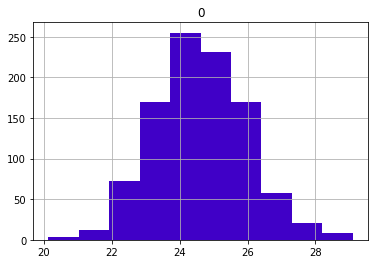

In [94]:
pd.DataFrame(sample_means).hist(color = '#4000c7');

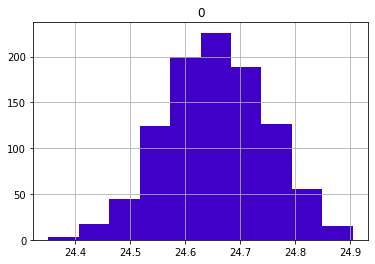

In [98]:
sample_means2 = []

for x in range(0,1000):
  rand_sample = df_challenge.sample(10000)
  sample_means2.append(rand_sample.mean())

pd.DataFrame(sample_means2).hist(color = '#4000c7');

In [100]:
sample_means_small = []
sample_means_medium = []
sample_means_large = []

# b(n, p)
# N(0,1) ~ N(u, sd)

for x in range(0, 3000):
  rand_sample_small = df_challenge.sample(100)
  rand_sample_medium = df_challenge.sample(1000)
  rand_sample_large = df_challenge.sample(10000)
  sample_means_small.append(rand_sample_small.mean())
  sample_means_medium.append(rand_sample_medium.mean())
  sample_means_large.append(rand_sample_large.mean())

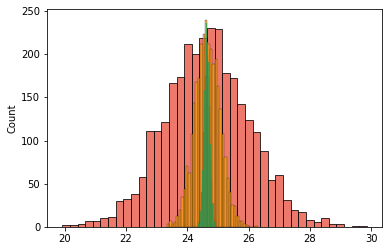

In [101]:
import seaborn as sns
ax = plt.subplots()

sns.histplot(sample_means_small, color = '#e74c3c')

sns.histplot(sample_means_medium, color = '#f39c12')

sns.histplot(sample_means_large, color = '#27ae60');
  
# sample_means_small -> red 
# sample_means_medium -> orange
# sample_means_large -> green